In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df=pd.read_csv('eda_data (1).csv')

In [4]:
df.columns

Index(['Unnamed: 0', 'Job Title', 'Salary Estimate', 'Job Description',
       'Rating', 'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python_yn', 'R_yn',
       'spark', 'aws', 'excel', 'job_simp', 'seniority', 'desc_len',
       'num_comp'],
      dtype='object')

In [5]:
df_model=df[['Rating','Size','Type of ownership','Industry','Sector','Revenue','num_comp','hourly','employer_provided','job_state','age','python_yn','spark','aws','excel','job_simp','seniority','desc_len','avg_salary']]

In [6]:
df_dum=pd.get_dummies(df_model)

In [7]:
 from sklearn.model_selection import train_test_split

In [8]:
X=df_dum.drop('avg_salary',axis=1)
y=df_dum.avg_salary.values

In [9]:
 X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

In [10]:
!pip install statsmodels
import statsmodels.api as sm
X_sm=X=sm.add_constant(X)


[notice] A new release of pip is available: 23.0 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:
model=sm.OLS(y,X_sm) #Ordinary least squares (OLS) regression is a method that allows us to find a line that best describes the relationship between one or more predictor variables and a response variable

In [12]:
model.fit().summary() #p value is checked to know the importance of variable in model building model. if p>0.005 than its not significant

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.638
Method:                 Least Squares   F-statistic:                     10.28
Date:                Fri, 26 Jan 2024   Prob (F-statistic):           6.85e-95
Time:                        14:11:17   Log-Likelihood:                -3312.2
No. Observations:                 742   AIC:                             6908.
Df Residuals:                     600   BIC:                             7563.
Df Model:                         141                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
const                                                44.3223      6.677      6.638      0.000      31.210      57.435
Rating                                                3.5579      1.936      1.837      0.067      -0.245       7.361
num_comp                                              2.1442      0.861      2.491      0.013       0.454       3.835
hourly                                              -37.4168      9.128     -4.099      0.000     -55.344     -19.489
employer_provided                                    30.9186     11.513      2.685      0.007       8.308      53.530
age                                                   0.0334      0.030      1.113      0.266      -0.026       0.092
python_yn                                             8.1364      2.523      3.225      0.001       3.181      13.092
spark                                                -0.6864      2.918     -0.235      0.814      -6.417       5.044
aws                                                   1.0237      2.734      0.374      0.708      -4.345       6.392
excel                                                -0.0242      2.232     -0.011      0.991      -4.407       4.359
desc_len                                          -6.889e-05      0.001     -0.091      0.928      -0.002       0.001
Size_-1                                              13.2784      8.621      1.540      0.124      -3.653      30.210
Size_1 to 50 employees                                1.6132      6.478      0.249      0.803     -11.110      14.336
Size_10000+ employees                                -3.1165      5.794     -0.538      0.591     -14.496       8.263
Size_1001 to 5000 employees                           6.2460      3.876      1.611      0.108      -1.367      13.859
Size_201 to 500 employees                             2.7672      3.835      0.721      0.471      -4.765      10.300
Size_5001 to 10000 employees                         -4.0768      5.436     -0.750      0.454     -14.753       6.599
Size_501 to 1000 employees                            2.6075      4.034      0.646      0.518      -5.316      10.531
Size_51 to 200 employees                              4.9868      4.343      1.148      0.251      -3.543      13.516
Size_Unknown                                         20.0164     13.960      1.434      0.152      -7.401      47.434
Type of ownership_-1                                 13.2784      8.621      1.540      0.124      -3.653      30.210
Type of ownership_College / University                6.3407     17.737      0.357      0.721     -28.493      41.175
Type of ownership_Company - Private                   8.3758      5.233      1.600      0.110      -1.902      18.654
Type of ownersh

In [13]:
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.model_selection import cross_val_score 

In [14]:
lm=LinearRegression()

In [15]:
lm.fit(X_train,y_train)


LinearRegression()

In [16]:
  np.mean(cross_val_score(lm,X_train,y_train,scoring='neg_mean_absolute_error',cv=3))

-20.76322000453583

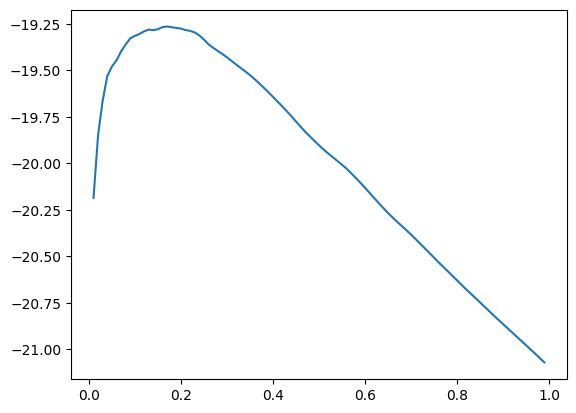

In [17]:
lm_l=Lasso(alpha=.13)
lm_l.fit(X_train,y_train)
np.mean(cross_val_score(lm_l,X_train,y_train,scoring="neg_mean_absolute_error",cv=3))
alpha=[]
error=[]
for i in range(1,100):
    alpha.append(i/100)
    lml=Lasso(alpha=(i/100))
    error.append(np.mean(cross_val_score(lml,X_train,y_train,scoring="neg_mean_absolute_error",cv=3)))
plt.plot(alpha,error)    
    #lasso regression is imp in feature selection

In [18]:
err = tuple(zip(alpha,error))
df_err = pd.DataFrame(err, columns = ['alpha','error'])
df_err[df_err.error == max(df_err.error)]

,alpha,error
16,0.17,-19.264006


In [19]:
#The cross-validation score is a measure of the model's ability to make accurate predictions on new, unseen data points.
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
np.mean(cross_val_score(rf,X_train,y_train,scoring="neg_mean_absolute_error",cv=3))

-15.053121485583416

In [20]:
#tune model
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators':range(10,300,10), 'criterion':('squared_error','absolute_error'),'max_features':('auto','sqrt','log2')}
gs=GridSearchCV(rf,parameters,scoring='neg_mean_absolute_error',cv=3)
gs.fit(X_train,y_train)
gs.best_score_

C:\Users\harshittiwari\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\harshittiwari\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\harshittiwari\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behav

C:\Users\harshittiwari\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\harshittiwari\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\harshittiwari\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behav

C:\Users\harshittiwari\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\harshittiwari\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\harshittiwari\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behav

C:\Users\harshittiwari\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\harshittiwari\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\harshittiwari\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behav

C:\Users\harshittiwari\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\harshittiwari\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\harshittiwari\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behav

C:\Users\harshittiwari\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\harshittiwari\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\harshittiwari\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behav

C:\Users\harshittiwari\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\harshittiwari\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\harshittiwari\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behav

C:\Users\harshittiwari\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\harshittiwari\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\harshittiwari\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behav

-14.846591312637562

In [21]:
gs.best_estimator_

RandomForestRegressor(max_features='auto', n_estimators=180)

In [22]:
#test ensembles
tpred_lm = lm.predict(X_test)
tpred_lml = lm_l.predict(X_test)
tpred_rf = gs.best_estimator_.predict(X_test)

In [23]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,tpred_lm)
mean_absolute_error(y_test,tpred_lml)
mean_absolute_error(y_test,tpred_rf)
mean_absolute_error(y_test,(tpred_lm+tpred_rf)/2)



14.295382697253299

In [24]:
import pickle
pickl = {'model': gs.best_estimator_}
pickle.dump( pickl, open( 'model_file' + ".p", "wb" ) )
file_name = "models/model_file.p"
with open(file_name, 'rb') as pickled:
        data = pickle.load(pickled)
        model = data['model']
model.predict(X_test.iloc[1,:].values.reshape(1,-1))

X_test.loc[1,:].values

FileNotFoundError: [Errno 2] No such file or directory: 'models/model_file.p'

In [25]:
list(X_test.iloc[1,:])

[3.6,
 0.0,
 0.0,
 0.0,
 34.0,
 0.0,
 0.0,
 0.0,
 1.0,
 4608.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
